In [1]:
from parse_xml import get_all_voting_records

arr, reps, bills = get_all_voting_records('../data/Senate/Votes')

print(arr)

Unable to read 115_1_162.xml
[[0. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


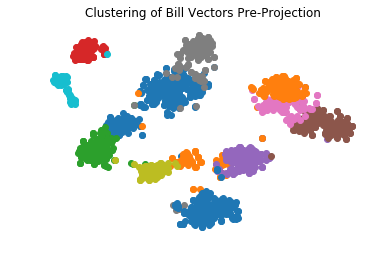

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
em = TSNE(n_components=2).fit_transform(arr.T)

# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 12
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
plt.axis('off')
plt.title('Clustering of Bill Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

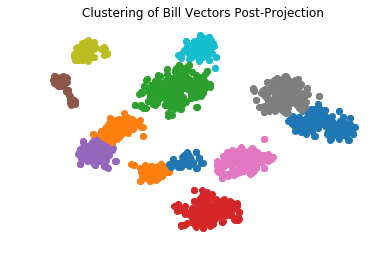

In [37]:
# Do the same after projection (not really that useful)
plt.axis('off')
num_clust = 13
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.title('Clustering of Bill Vectors Post-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

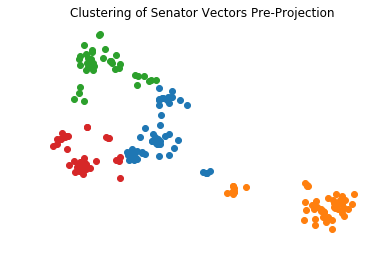

In [38]:
# And for the senators

em = TSNE(n_components=2).fit_transform(arr)
num_clust = 4
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.axis('off')
plt.title('Clustering of Senator Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

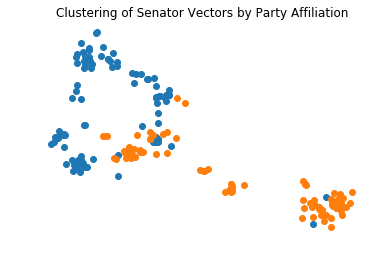

In [39]:
import numpy as np

# Senators by party with same projection

num_clust = 4
centers = np.array([1 if '(D' in x else 0 for x in reps])
plt.axis('off')
plt.title('Clustering of Senator Vectors by Party Affiliation')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()